## NAME : NIVEDITA SRIVASTAVA
## DOMAIN: DATA SCIENCE

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [39]:
unemployment = pd.read_csv("Unemployment in India.csv")


In [40]:
unemployment.head()



,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [41]:
unemployment.dtypes


Region                                       object
 Date                                        object
 Frequency                                   object
 Estimated Unemployment Rate (%)            float64
 Estimated Employed                         float64
 Estimated Labour Participation Rate (%)    float64
Area                                         object
dtype: object

In [42]:
unemployment.describe()


,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [43]:
unemployment.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [44]:
unemployment.isnull().sum()


Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [45]:
unemployment.dropna(axis = 0, inplace = True)


In [46]:
unemployment.isnull().sum()


Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [47]:
unemployment.shape


(740, 7)

In [48]:
unemployment.columns


Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [52]:

unemployment.rename(columns={' Date':'Date',
                         ' Frequency':'Frequency',
                         ' Estimated Unemployment Rate (%)':'Estimated Unemployment Rate (%)',
                        ' Estimated Employed':'Estimated Employed',
                        ' Estimated Labour Participation Rate (%)':'Estimated Labour Participation Rate (%)'},inplace=True)

In [53]:
unemployment.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [54]:
unemployment[unemployment.duplicated()]


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area


In [55]:
unemployment.duplicated().sum()


0

In [56]:
unemployment['Date']=pd.to_datetime(unemployment['Date'])



In [57]:
unemployment.dtypes


Region                                             object
Date                                       datetime64[ns]
Frequency                                          object
Estimated Unemployment Rate (%)                   float64
Estimated Employed                                float64
Estimated Labour Participation Rate (%)           float64
Area                                               object
dtype: object

In [58]:
unemployment['day']=unemployment['Date'].dt.day
unemployment['month']=unemployment['Date'].dt.month_name()
unemployment['year']=unemployment['Date'].dt.year

In [59]:
unemployment.head()


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area,day,month,year
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,31,May,2019
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,30,June,2019
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,31,July,2019
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,31,August,2019
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,30,September,2019


In [60]:
unemployment.columns


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)', 'Area',
       'day', 'month', 'year'],
      dtype='object')

In [61]:
unemployment['Region'].unique()


array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

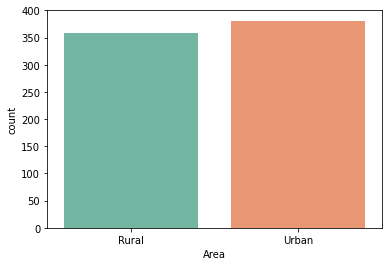

In [62]:
sns.countplot(x=unemployment['Area'],palette = "Set2")
plt.show()

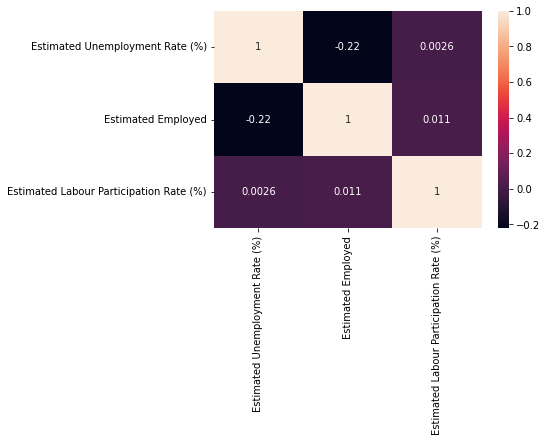

In [63]:
sns.heatmap(unemployment[['Estimated Unemployment Rate (%)',
                'Estimated Employed',
                'Estimated Labour Participation Rate (%)']].corr(),
            annot=True
           )
plt.show()

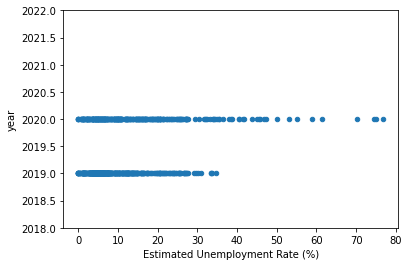

In [64]:
unemployment.plot(kind="scatter", x='Estimated Unemployment Rate (%)', y='year')

# for changing y_axis range from 2018 to 2022
plt.ylim(2018,2022)
plt.show()

<AxesSubplot:xlabel='Estimated Labour Participation Rate (%)', ylabel='Region'>

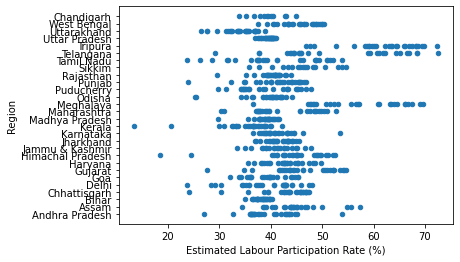

In [65]:
unemployment.plot(kind="scatter", x='Estimated Labour Participation Rate (%)', y='Region')


In [67]:
px.scatter(data_frame=unemployment, x='Estimated Unemployment Rate (%)',
           y='Region', animation_frame='year')

In [68]:
unemployment1 = unemployment[["Region", 'Estimated Unemployment Rate (%)']]

fig = px.sunburst(unemployment1, path=['Region'], values='Estimated Unemployment Rate (%)',
                  title= 'Unemployment rate in every State in India', height=650)
fig.show()